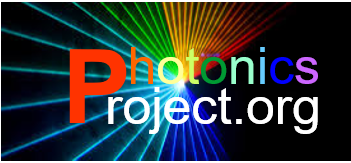
## Function: Atmospheric Turbulence MTF

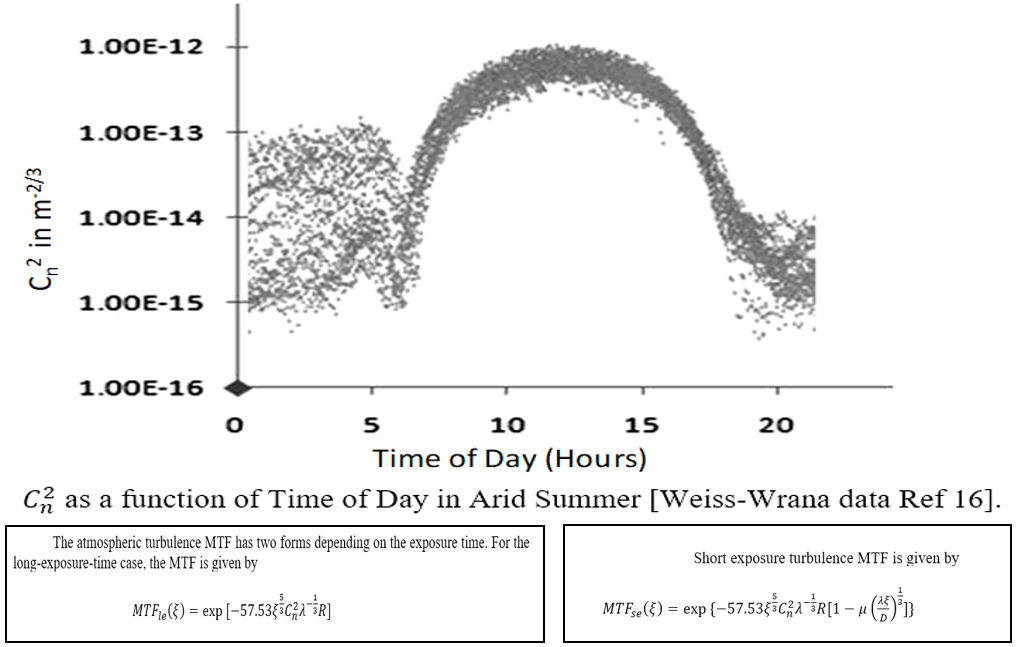

In [1]:

#PLOT Plank Blackbody curve including subinterval
%matplotlib inline
#%matplotlib notebook

from ipywidgets import interact, Layout, widgets
import numpy as np
import math
import scipy.special as sp
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
#import winsound



numpts = 500
cnt = 0
u= 0.5  # far field approximation
MTFLE = np.zeros([numpts])
MTFSE = np.zeros([numpts])
xeta = np.zeros([numpts])


print ('Short Exposure is defined where the temporal atmospheric effects are frozen (~1msec or less)')
print ('For the Short Exposure calculation, we use u=0.5 for the far field case where D <<(λR)^1/2')
print ('Violating these assumptions can give physically unreasonable results.')

def plot_func(CN2,WVL,Dia,Range):

    #input validation
    skip = False
    if CN2 <=0:
        skip = True
    if WVL <=0:
        skip = True
    if Dia <=0:
        skip = True
    if Range <=0:
        skip = True
    if skip == True:
        print ('invalid inputs')
        #frequency = 110  # Set Frequency To 2500 Hertz
        #duration = 1000  # Set Duration To 1000 ms == 1 second
        #winsound.Beep(frequency, duration)
        frequency = 80  # Set Frequency To 2500 Hertz
        duration = 1000  # Set Duration To 1000 ms == 1 second
        #winsound.Beep(frequency, duration)
    
    else: #inputs are valid, proceed with calculations
            
            #initialize the list inside loop
            MTFSEC =[]  #critical value where increases start
            xetac = [] 
            MTFSECF =[] #critical value where f/# limit is reached
            xetacf = []
            MTFSECRD =[] #critical value where f/# limit is reached
            xetacrd = []
            flimit = 25/WVL
            #print (flimit)
            
            #find overall limit to plot axis.
            lowlim=0.001 #arbitrary choice for where to cutoff plot
            wvlt=(WVL*1e-06)**(-1/3)
            limit2 = (math.log(lowlim)/((-57.53)*CN2*wvlt*Range*1000))
            limit=int(limit2**(3/5))
            step = round(limit/numpts,1)
            #print(math.log(0.01),wvlt,limit2,limit, step)
    
            #set initial parameters - point 0 to 1      
            MTFLE[0]=1
            MTFSE[0]=1
            xeta[0]=0
            MTFLE50=limit/1000
            MTFSE50=limit/1000
            LEdone = False
            SEdone = False
            #compute MTF's
            for i in range(1,numpts):
                xeta[i] = i * step
                temp1 = xeta[i]**(5/3)
                temp2 =(WVL*1e-6)**(-1/3)
                temp3 = -57.53*temp1*CN2*temp2*(Range*1000)
                temp4 = (1-u*(((WVL*1e-6*xeta[i])/Dia)**(1/3)))
                MTFLE[i] = math.exp(temp3)
                MTFSE[i] = math.exp(temp3*temp4)
                if xeta[i]/1000 < flimit :
                    MTFSECF.append(float(MTFSE[i])) 
                    xetacf.append(float(xeta[i]/1000))
                elif MTFSE[i] <MTFSE[i-1] :
                    MTFSEC.append(float(MTFSE[i])) 
                    xetac.append(float(xeta[i]/1000))
                else :
                    MTFSECRD.append(float(MTFSE[i])) 
                    xetacrd.append(float(xeta[i]/1000))
                
                if LEdone == False:    
                    if MTFLE[i] <0.75:      #find 75% point
                        MTFLE50=xeta[i]/1000
                        LEdone= True
                if SEdone == False:
                    if MTFSE[i] <0.75:      #find 75% point
                        MTFSE50=xeta[i]/1000
                        SEdone= True
                #print(' x= ',xeta[i], temp1, temp2, temp3,temp4, ' y= ',MTFSE[i])
                #print(xetac[i], MTFSEC[i])
                i +=  1

   
            # plot MTFLE and MTFSE
            plt.style.use('classic')
            fig = plt.figure(figsize=(12,8))
            ax1 = fig.add_subplot(1, 1, 1)
            ax1.plot(xeta/1000, MTFLE,'-m',label="Long Exposure",linewidth=2.0)     
            ax1.plot(xetacf, MTFSECF,'-b',label= "Short Exposure",linewidth=2.5)
            ax1.plot(xetac, MTFSEC,'--b',linewidth=1.5)
            ax1.plot(xetacrd, MTFSECRD,'--r', linewidth=2.0)
                      
            ax1.legend(loc='upper right',fontsize='large')
            plt.axis([0, int(limit/1000),0,1.0])
            plt.xlabel('Epsilon ξ - Cycles/mrad')
            plt.ylabel('MTF')
            plt.title('Atmospheric Turbulence MTF')

            #plot 50% lines vertical line
            xlineLE = [MTFLE50,MTFLE50,MTFLE50]
            xlineSE = [MTFSE50,MTFSE50,MTFSE50]
            yline = [0,0.5,1]
            ax1.plot(xlineLE,yline,':m',linewidth=2.0)
            ax1.plot(xlineSE,yline,':b',linewidth=2.0)
            ax1.text(MTFLE50 + (limit/100000), 0.93,str(round(MTFLE50,2)),color='magenta')
            if MTFSE50 < limit/1000:
                ax1.text(MTFSE50 + (limit/100000), 0.96,str(round(MTFSE50,2)),color='blue')
            
            #plot 25,50,75% horiz line
            xline50 = [0, limit/1000]
            ax1.plot(xline50,[0.25,0.25],':k',linewidth=1.0)
            ax1.text(0.9*limit/1000, 0.26,'25% MTF',color='grey')      
            ax1.plot(xline50,[0.5,0.5],':k',linewidth=1.0)
            ax1.text(0.9*limit/1000, 0.51,'50% MTF',color='grey')
            ax1.plot(xline50,[0.75,0.75],'-k',linewidth=1.0)
            ax1.text(0.9*limit/1000, 0.76,'75% MTF',color='black')
            
            # Major ticks every 20, minor ticks every 5
            major_xticks = np.arange(0, (limit)/1000, round(step/20,2))
            minor_xticks = np.arange(0, (limit/1000), round(step/100,2))
            ax1.set_xticks(major_xticks)
            ax1.set_xticks(minor_xticks, minor=True)     
            # And a corresponding grid
            ax1.grid(which='major', alpha=0.75)
            ax1.grid(which='minor', alpha=0.25)
            #plt.grid(True)             
                
                
# Description width style
style1 = {'description_width': 'initial'}            
#WaveDesc='WVL  (' + chr(9555) +' um)'
interact(plot_func,
        CN2 = widgets.FloatText(value=5E-14, step=5e-15,description="CN2 Index Structure Parameter",style=style1),
        WVL = widgets.FloatText(value=8, min=1, max=25, step=0.25,description='WVL (' + chr(955) + ' um)',style=style1),
        Dia = widgets.FloatText(value=0.025, min=0.001, max=1, step=0.025,description='Pupil Diameter (m)',style=style1),
        Range = widgets.FloatSlider(value=15, min=1, max=50,step=0.5,description="Range (Km)",layout=Layout(width='885px'),continuous_update=False,style=style1),
        )


interactive(children=(Dropdown(description='log', options=('False', 'True'), value='False'), Dropdown(descript…

<function __main__.plot_func(log, clear, CN2, WVL, Range)>